In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import mean_squared_error,r2_score
import sklearn.metrics
import warnings
import xgboost as xgb
import scipy as sc
import math
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from math import sqrt
from sklearn import svm, datasets
from sklearn.linear_model import Ridge###导入岭回归算法
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score#做一下交叉验证
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve as ROC
from sklearn.metrics import auc as AUC
from matplotlib.ticker import MultipleLocator, FormatStrFormatter 
from matplotlib.lines import Line2D
import io
from PIL import Image
from matplotlib.font_manager import FontProperties

In [2]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.4.0
anyio                        3.5.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
attrs                        22.1.0
backcall                     0.2.0
bayesian-optimization        1.4.2
BayesianOptimization         0.0.0
beautifulsoup4               4.11.1
bleach                       4.1.0
Boruta                       0.3
cachetools                   5.3.0
catboost                     1.2
category-encoders            1.1.2
certifi                      2022.12.7
cffi                         1.15.1
charset-normalizer           3.1.0
cloudpickle                  2.2.1
cmapPy                       4.0.1
colorama                     0.4.6
comm                         0.1.2
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.5.1
decora

In [20]:

def model_score2(X1_test,Y1_test,X2_test,Y2_test,X3_test,Y3_test,label1,label2,label3,model):
    df = pd.DataFrame()
    predict_true=pd.DataFrame()
    from sklearn.metrics import roc_curve as ROC
  
    from sklearn.metrics import auc as AUC
   ###################################################### HEK293 ###################################################
    plt.figure(dpi=1000,figsize=(3.2,3))
    sns.set(style='ticks')
    plt.xlabel('FPR',size=12, weight='bold')
    plt.ylabel('TPR',size=12, weight='bold')
    predict_test = model.predict(X1_test)
    prob_test = model.predict_proba(X1_test)
    predict_test_value = prob_test[:, 1]
    report=sklearn.metrics.classification_report(Y1_test, predict_test,output_dict=True)
    df_1= pd.DataFrame(report).transpose()
    df=pd.concat([df,df_1],axis=0) 
    y_true=Y1_test
    predict_test = model.predict(X1_test)
    prob_test = model.predict_proba(X1_test)
    predict_test_value = prob_test[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve( Y1_test,predict_test_value)
    roc_auc1 = metrics.auc(fpr, tpr)
    auc1=str(AUC(fpr,tpr))[:4]
    plt.plot(fpr, tpr,"k", lw=1)
    predict_test_1=pd.DataFrame(predict_test)
    predict_test_1.index=Y1_test.index
    
###################################################### 

    plt.legend(['AUC = %0.4f' % roc_auc1],loc=0,prop=FontProperties(weight='bold'))
    plt.ylim(0,1.1)
    plt.xticks(size=12, weight='bold')
    plt.yticks(size=12, weight='bold')
    plt.tight_layout() 
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.fill_between(fpr, tpr, color='#7BCBBE', alpha=0.9)
    plt.title(label1,size=12, weight='bold')
    ######################################################
    
    plt.savefig("CV50_HEK293_AUC_20240106.svg", format='svg',bbox_inches='tight')
    plt.savefig("CV50_HEK293_AUC_20240106.jpeg", format='jpeg',bbox_inches='tight')
    plt.savefig("CV50_HEK293_AUC_20240106.pdf", format='pdf',bbox_inches='tight')

###################################################### HEPG2  ###################################################
    plt.figure(dpi=1000,figsize=(3.2,3))
    sns.set_palette('GnBu',4)
    sns.set(style='ticks')
 
    plt.xlabel('FPR',size=12, weight='bold')
    plt.ylabel('TPR',size=12, weight='bold')
    predict_test = model.predict(X2_test)
    prob_test = model.predict_proba(X2_test)
    predict_test_value = prob_test[:, 1]
    report=sklearn.metrics.classification_report(Y2_test, predict_test,output_dict=True)
    df_1= pd.DataFrame(report).transpose()
    df=pd.concat([df,df_1],axis=0) 
    y_true=Y2_test
    predict_test = model.predict(X2_test)
    prob_test = model.predict_proba(X2_test)
    predict_test_value = prob_test[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve( Y2_test,predict_test_value)
    roc_auc2 = metrics.auc(fpr, tpr)
    auc2=str(AUC(fpr,tpr))[:4]
    plt.plot(fpr, tpr,"k", lw=1)
    Y2_test=pd.DataFrame(Y2_test)
    predict_test_2=pd.DataFrame(predict_test)
    predict_test_2.index=Y2_test.index
        ###################################################### 

    plt.legend(['AUC = %0.4f' % roc_auc2],loc=0, prop=FontProperties(weight='bold'))
    plt.ylim(0,1.1)
    plt.xticks(size=12, weight='bold')
    plt.yticks(size=12, weight='bold')
    plt.tight_layout() 
    plt.plot([0, 1], [0, 1],"k--")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.fill_between(fpr, tpr, color='#EABE8D', alpha=0.9)
    plt.title(label2,size=12, weight='bold')
    
    plt.savefig("CV50_HepG2_AUC_20240106.svg", format='svg',bbox_inches='tight')
    plt.savefig("CV50_HepG2_AUC_20240106.jpeg", format='jpeg',bbox_inches='tight')
    plt.savefig("CV50_HepG2_AUC_20240106.pdf", format='pdf',bbox_inches='tight')
    
   ###################################################### HT29  ###################################################
    plt.figure(dpi=1000,figsize=(3.2,3))
    sns.set_palette('GnBu',5)
    sns.set(style='ticks')
 
    plt.xlabel('FPR',size=12, weight='bold')
    plt.ylabel('TPR',size=12, weight='bold')
    
    ####################################################
    
    
    predict_test = model.predict(X3_test)
    prob_test = model.predict_proba(X3_test)
    predict_test_value = prob_test[:, 1]
    report=sklearn.metrics.classification_report(Y3_test, predict_test,output_dict=True)
        
    df_1= pd.DataFrame(report).transpose()
        
    df=pd.concat([df,df_1],axis=0) 

    
    y_true=Y3_test
    
    
    predict_test = model.predict(X3_test)
    prob_test = model.predict_proba(X3_test)
    predict_test_value = prob_test[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve( Y3_test,predict_test_value)
    roc_auc3 = metrics.auc(fpr, tpr)
   
    auc3=str(AUC(fpr,tpr))[:4]
    plt.plot(fpr, tpr, "k",lw=1)
    
    
    predict_test_3=pd.DataFrame(predict_test)
    predict_test_3.index=Y3_test.index
    predict_true=pd.concat([predict_test_1,predict_test_2,predict_test_3],axis=1,ignore_index= True)
    predict_true.columns=["HEK293_predict","HepG2_predict","HT-29_predict"]
    plt.legend(['AUC = %0.4f' % roc_auc3,],loc=0,prop=FontProperties(weight='bold'))
    
    plt.ylim(0,1.1)
    plt.xticks(size=12, weight='bold')
    plt.yticks(size=12, weight='bold')
    plt.tight_layout() 
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.fill_between(fpr, tpr, color='#ACC8E5', alpha=0.8)
    plt.title(label3,size=12, weight='bold')
    plt.savefig("CV50_HT-29_AUC_20240106.svg", format='svg',bbox_inches='tight')
    plt.savefig("CV50_HT-29_AUC_20240106.jpeg", format='jpeg',bbox_inches='tight')
    plt.savefig("CV50_HT-29_AUC_20240106.pdf", format='pdf',bbox_inches='tight')

   
    return df,predict_true

In [12]:
hek293_cv50= pd.read_csv('CV50_Hek293_after_MODZ_with_cv_20230630.csv',index_col = 0)
HepG2_cv50= pd.read_csv('CV50_HepG2_after_MODZ_with_cv_20230630.csv',index_col = 0)
HT29_cv50= pd.read_csv('CV50_HT29_after_MODZ_with_cv_20230630.csv',index_col = 0)

X_293_cv50=hek293_cv50.iloc[:,3:295]
X_HepG2_cv50=HepG2_cv50.iloc[:,3:295]
X_HT29_cv50=HT29_cv50.iloc[:,3:295]

In [13]:
import pickle
model_cv50=pickle.load(open("CV0.5_Voting_model_20230630.dat","rb"))

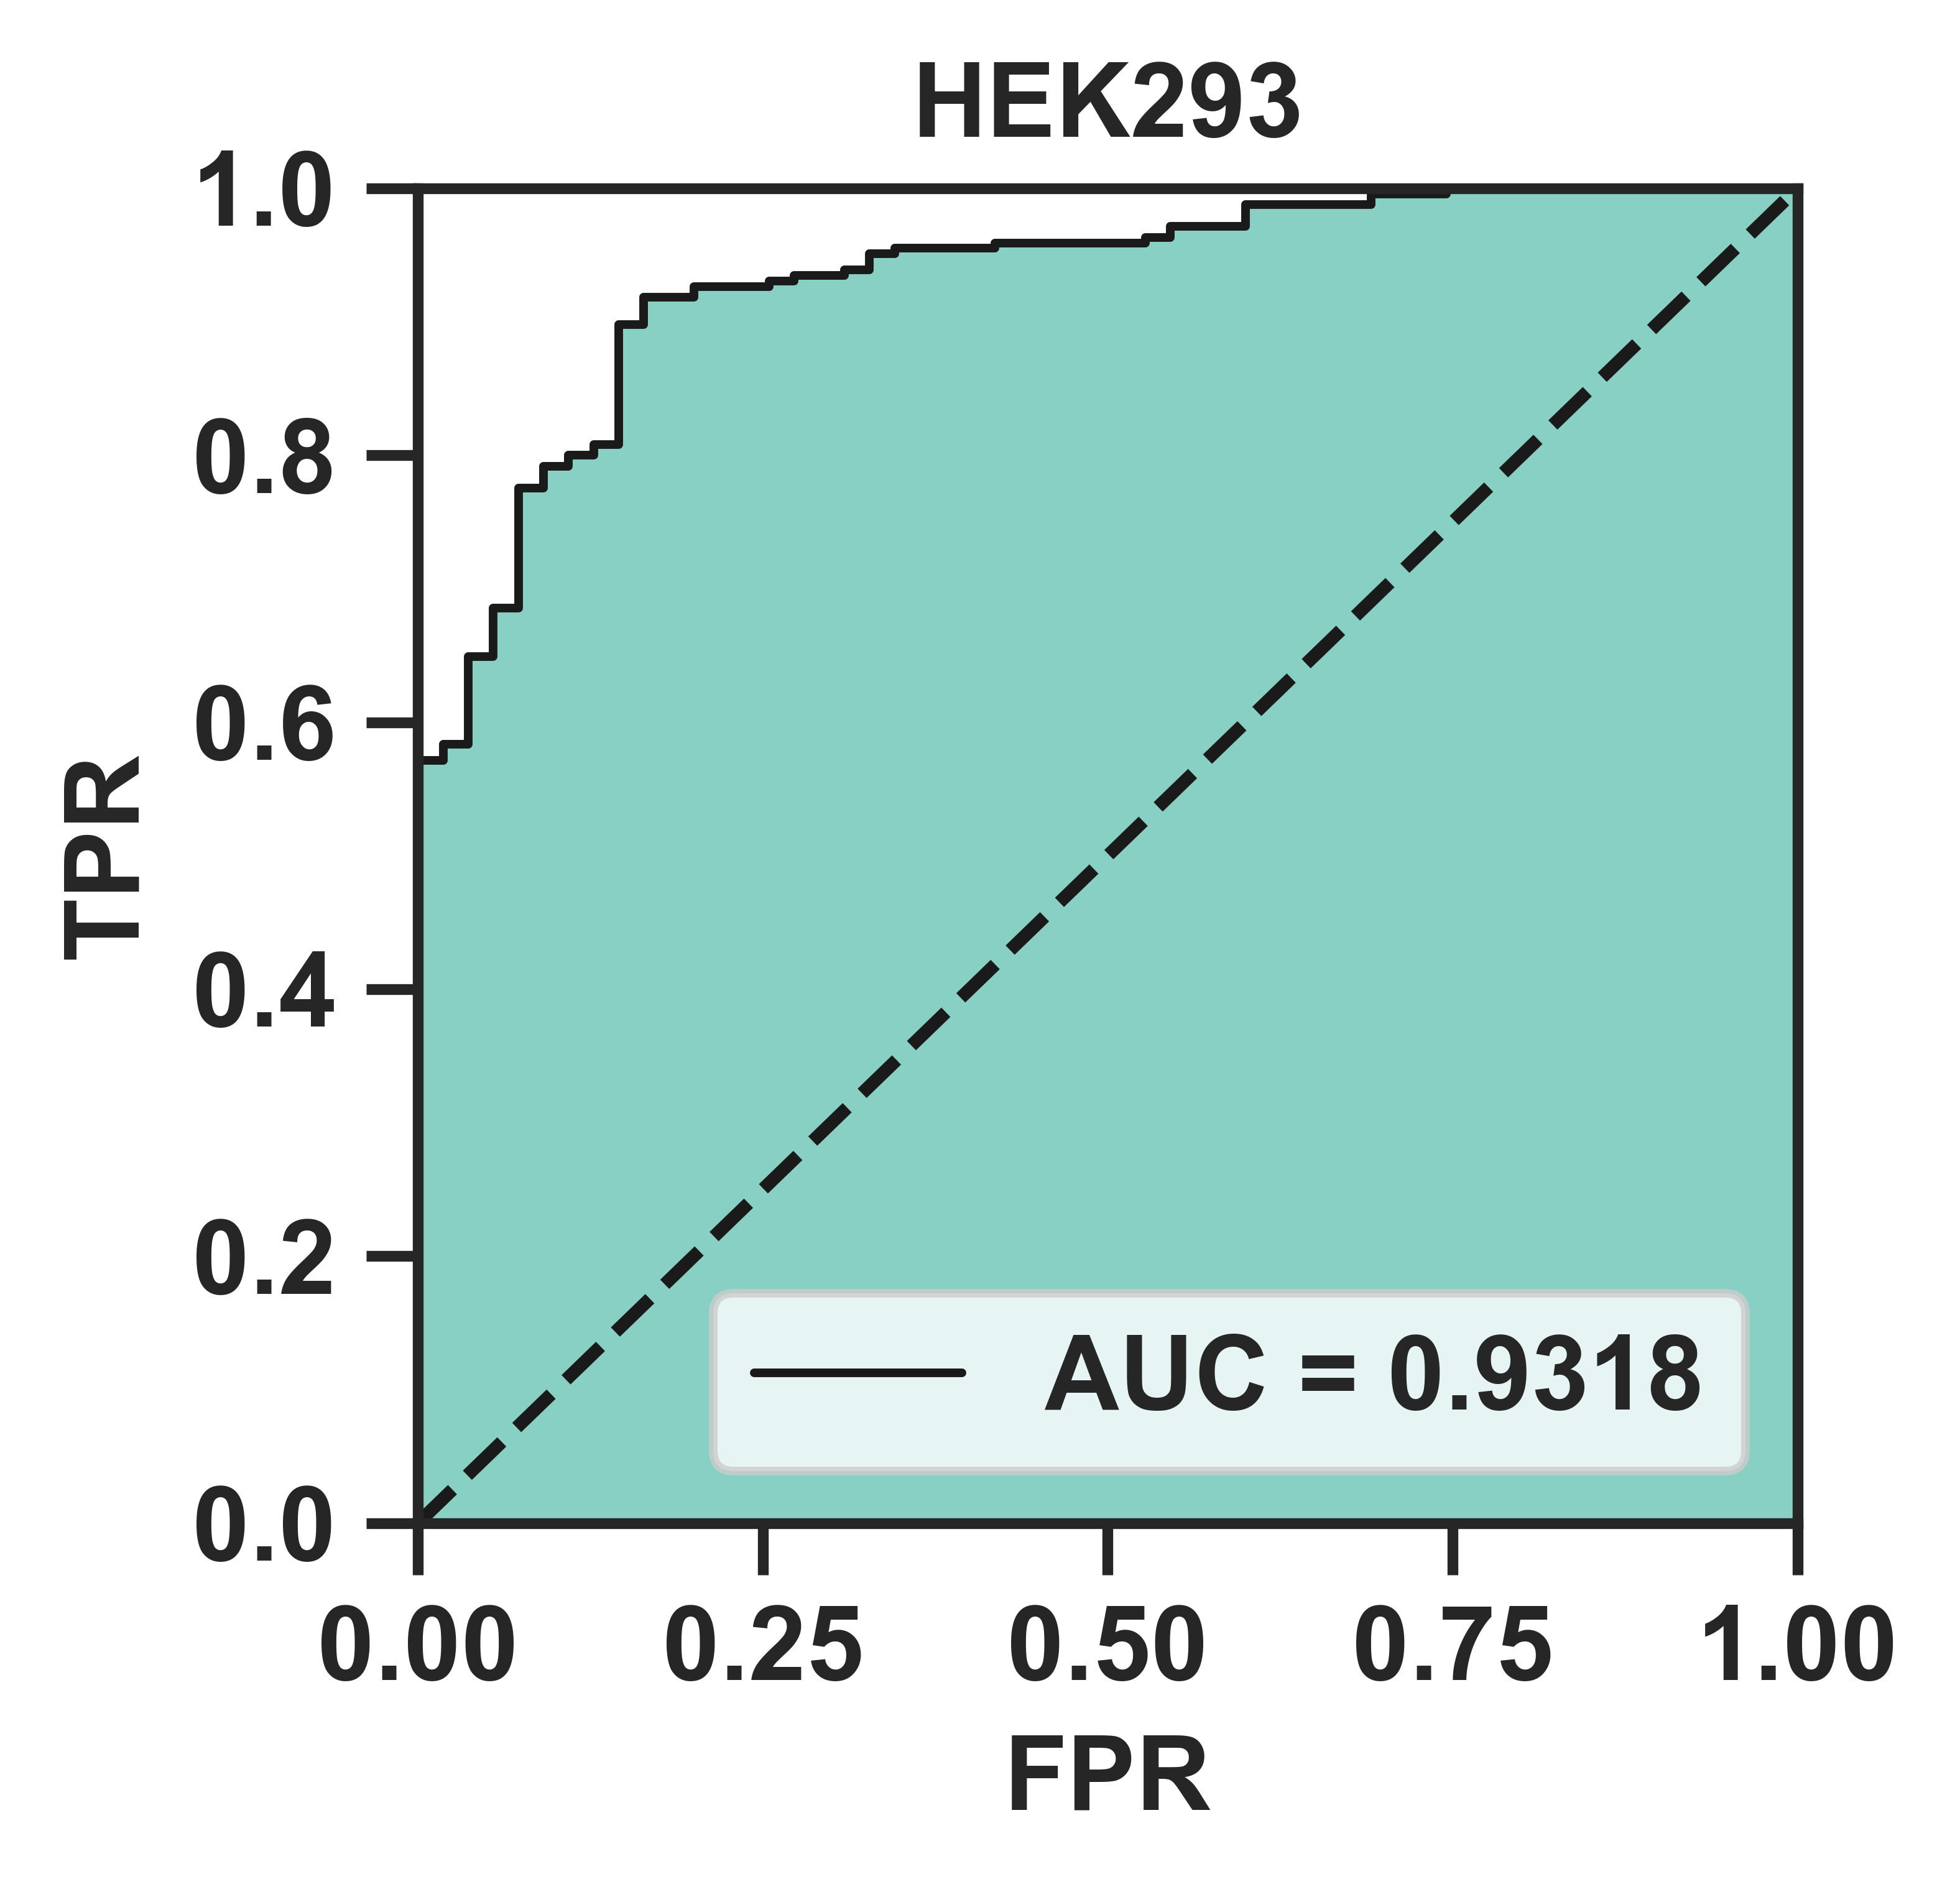

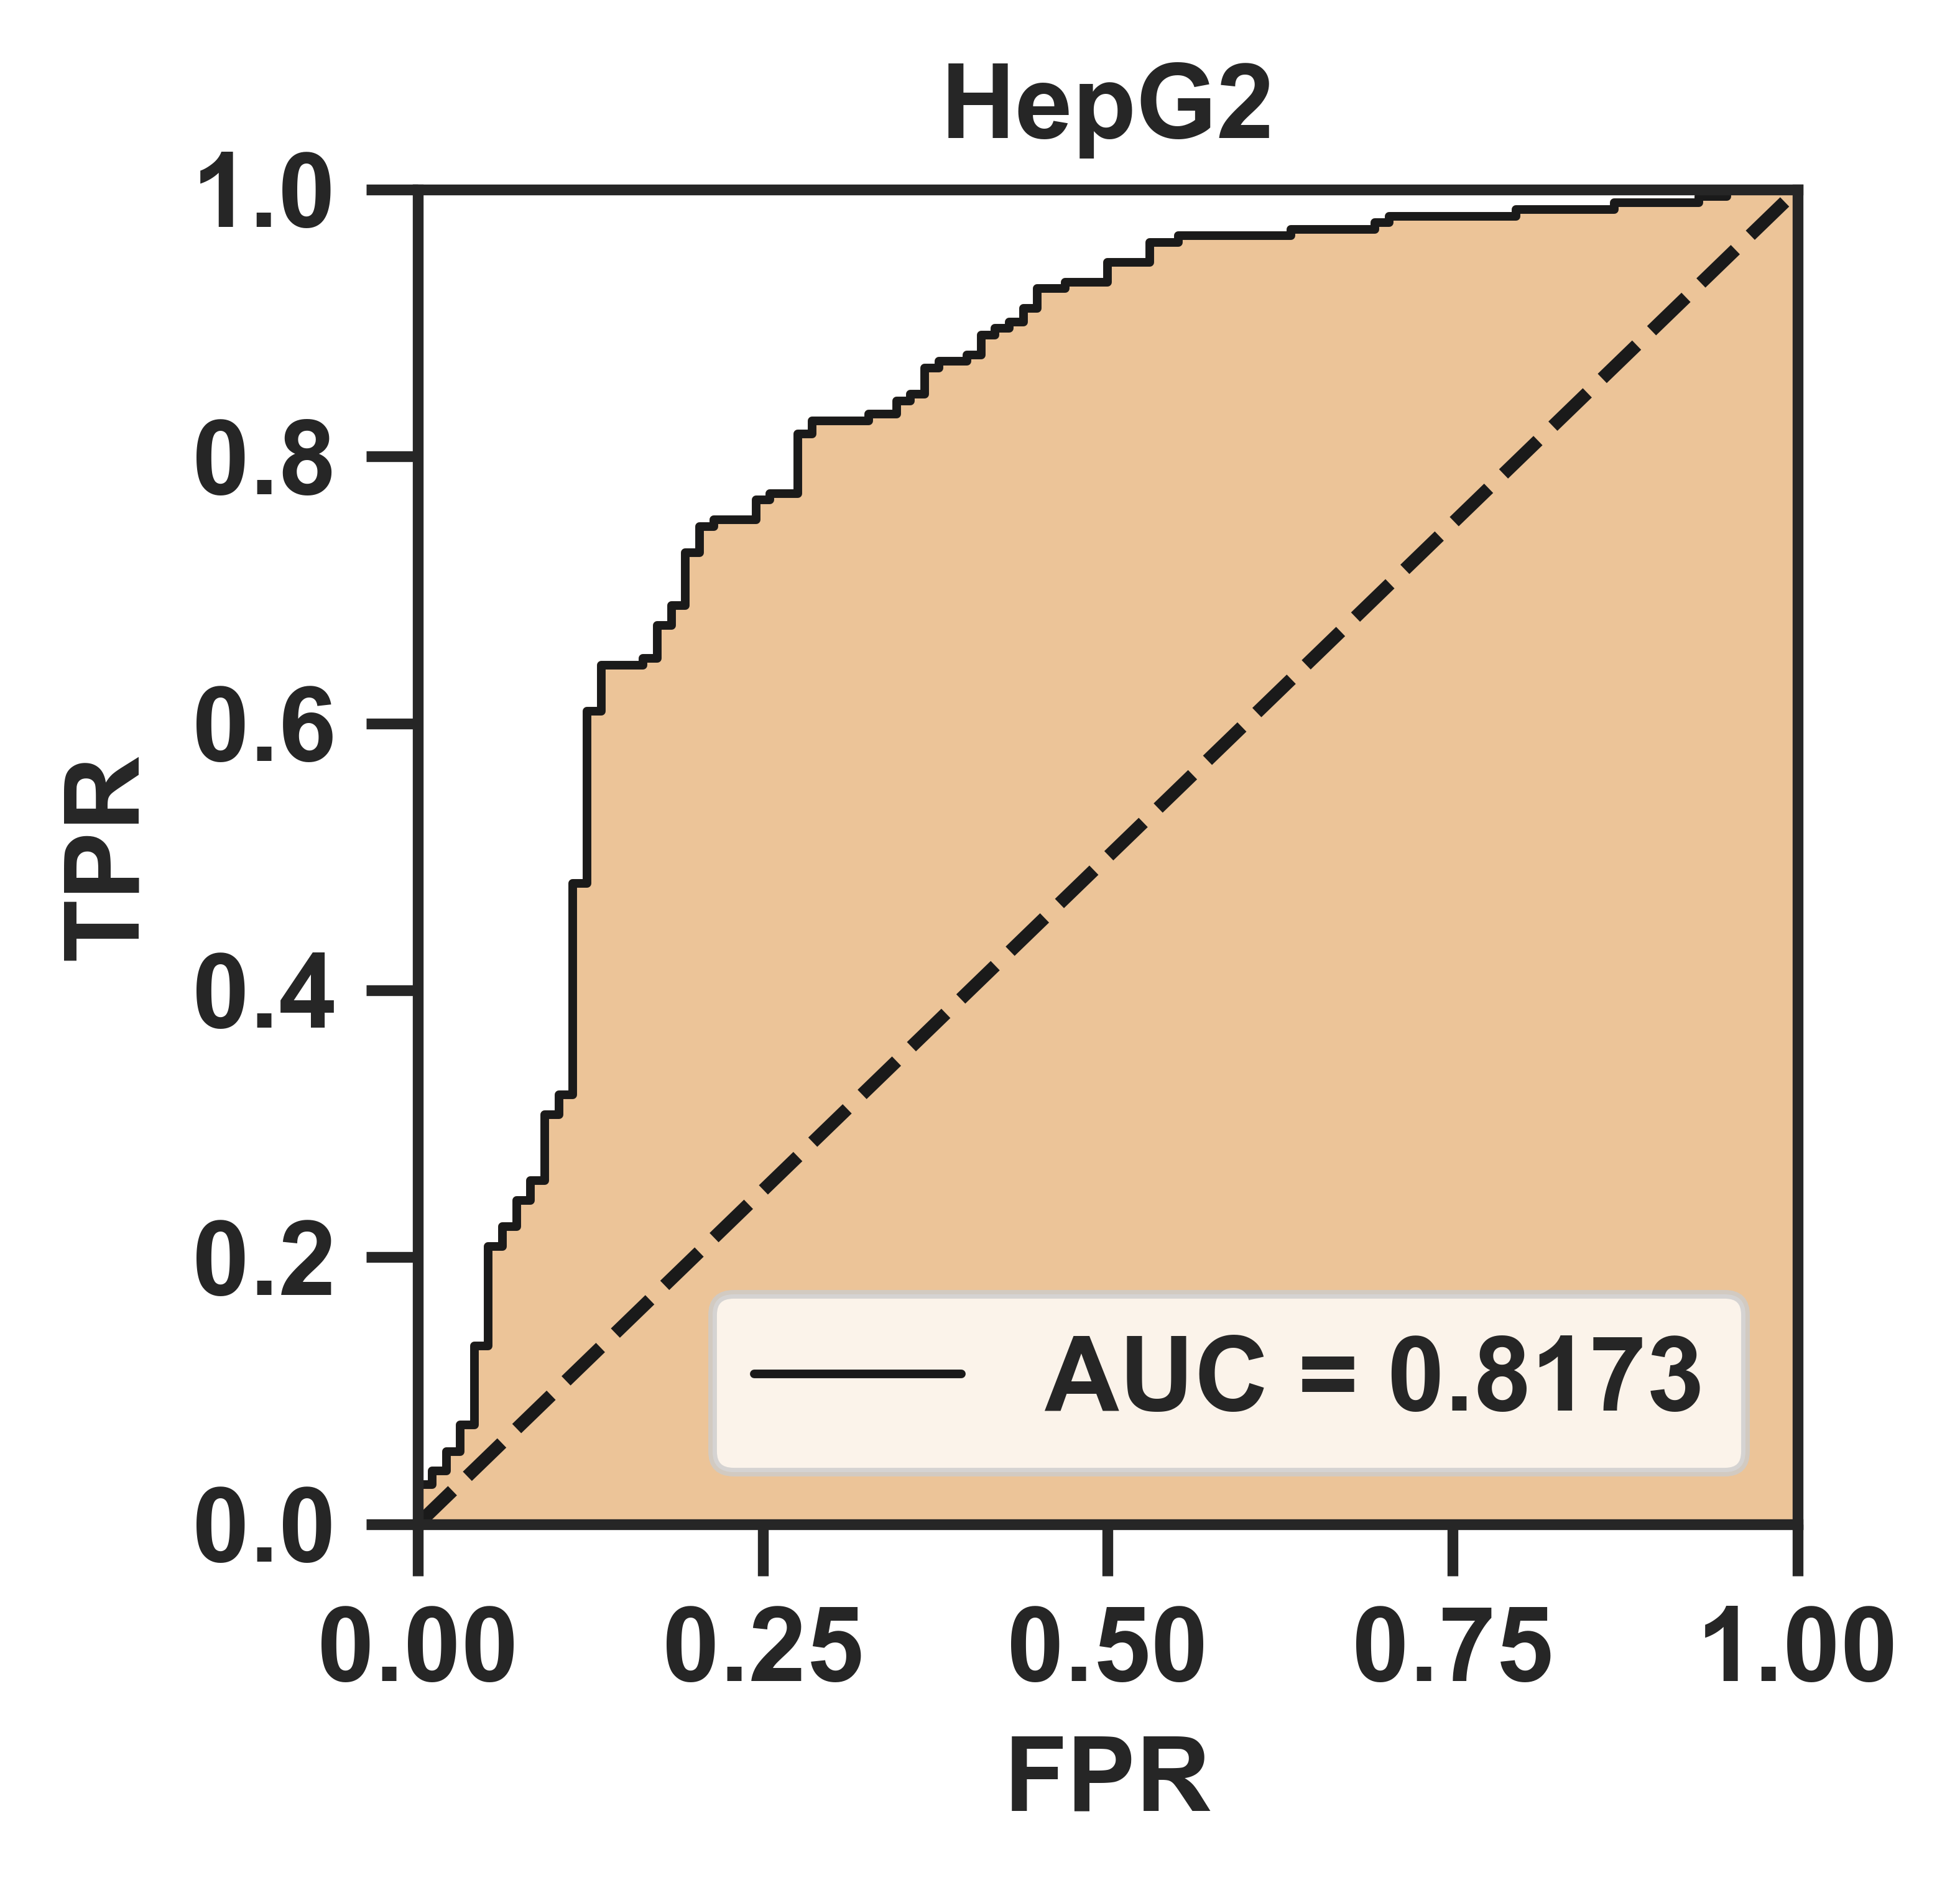

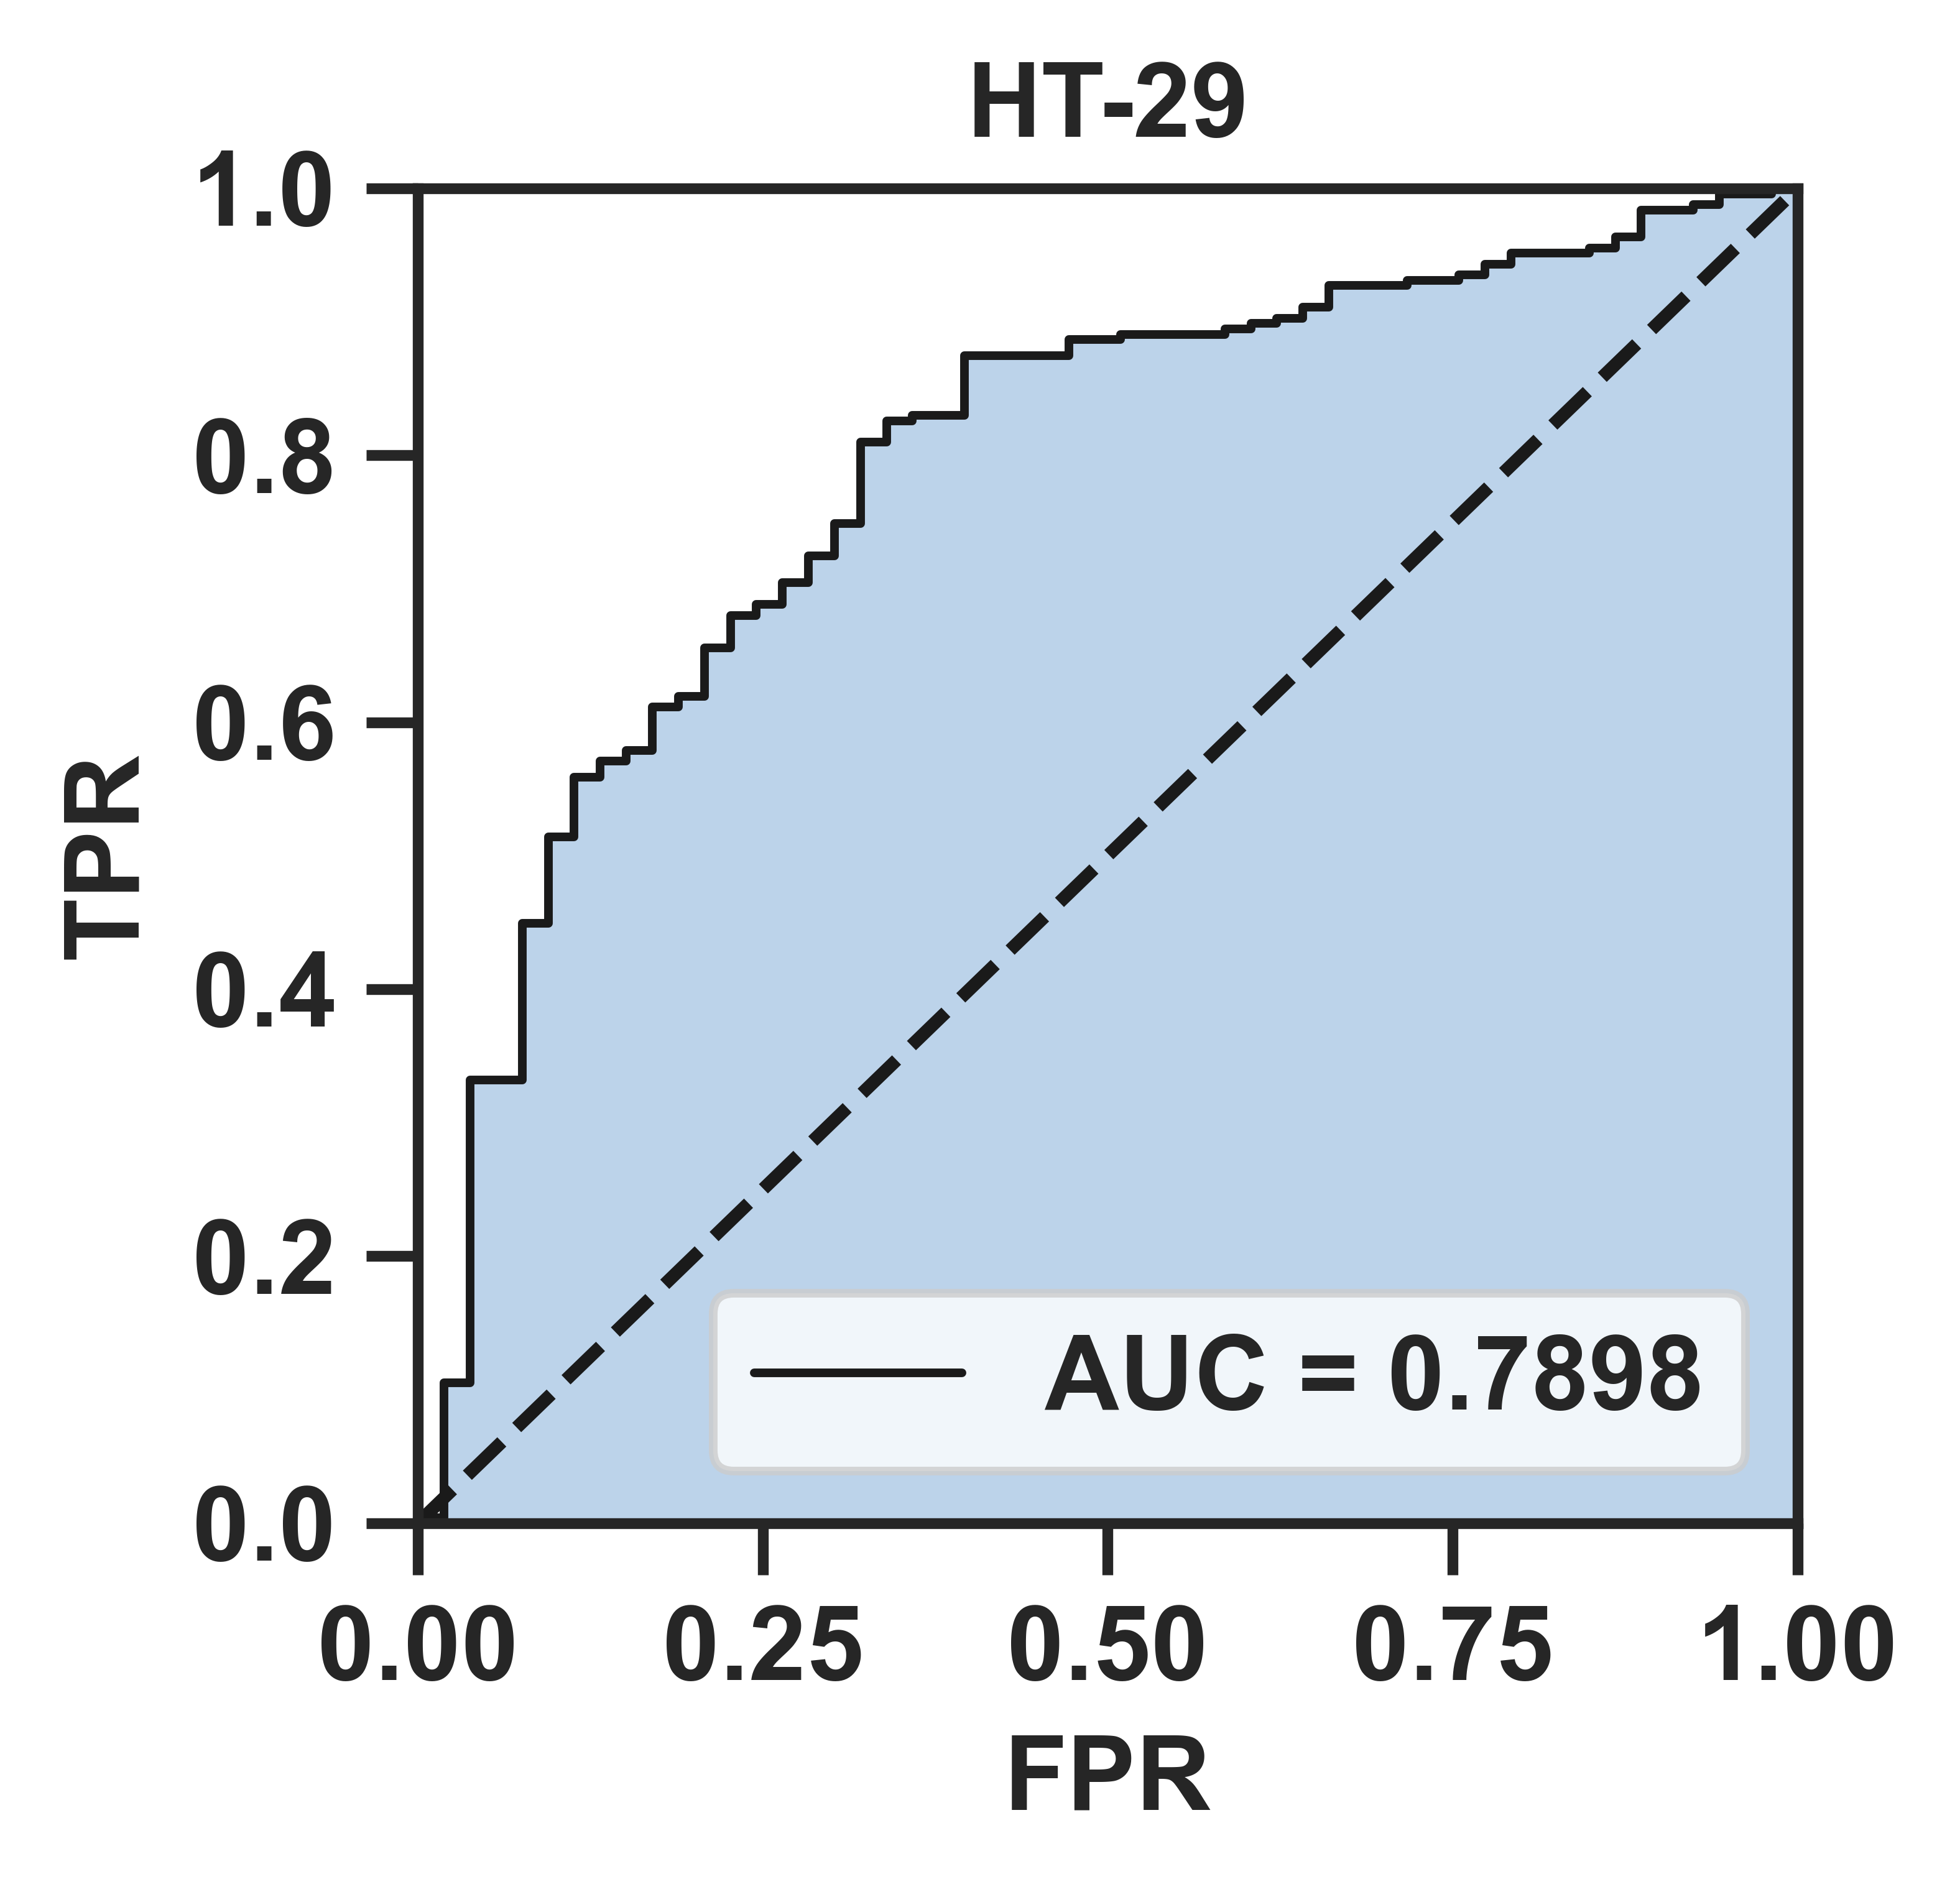

In [21]:
Y_293T_cv50=hek293_cv50["cv_0.5"]
Y_HepG2_cv50=HepG2_cv50["cv_0.5"]
Y_HT29_cv50=HT29_cv50["cv_0.5"]
CV50,predict_test_cv50=model_score2(X_293_cv50,Y_293T_cv50,X_HepG2_cv50,Y_HepG2_cv50,X_HT29_cv50,Y_HT29_cv50,"HEK293","HepG2","HT-29",model_cv50)